In [5]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = (12, 8)

The Normal distribution
=======================================

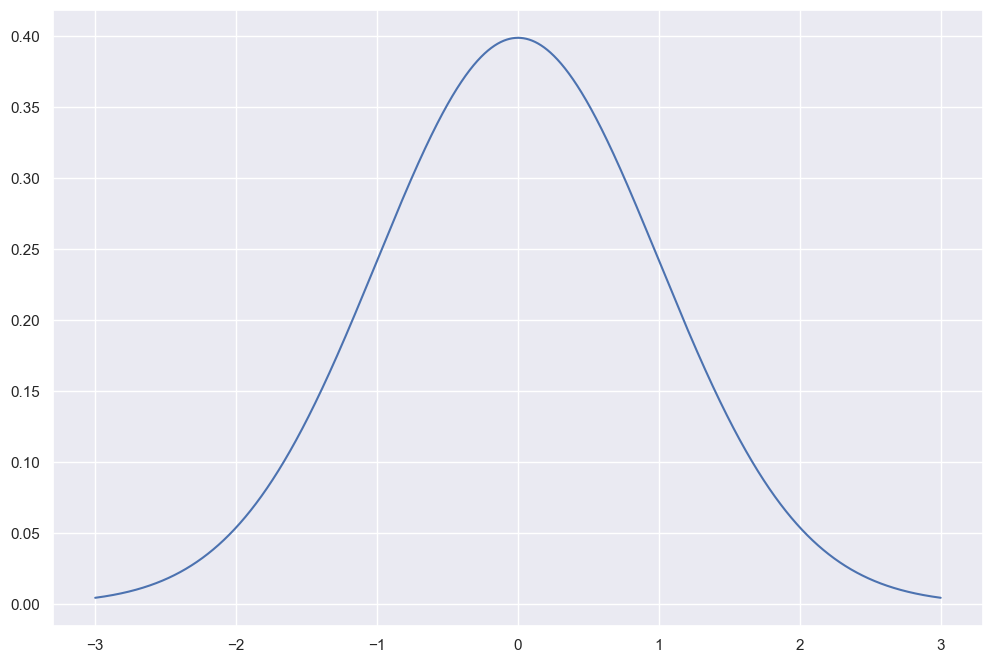

In [7]:
# Plotting the standard normal distribution
range = np.arange(-3,3,0.001)
plt.plot(range, stats.norm.pdf(range, 0, 1));

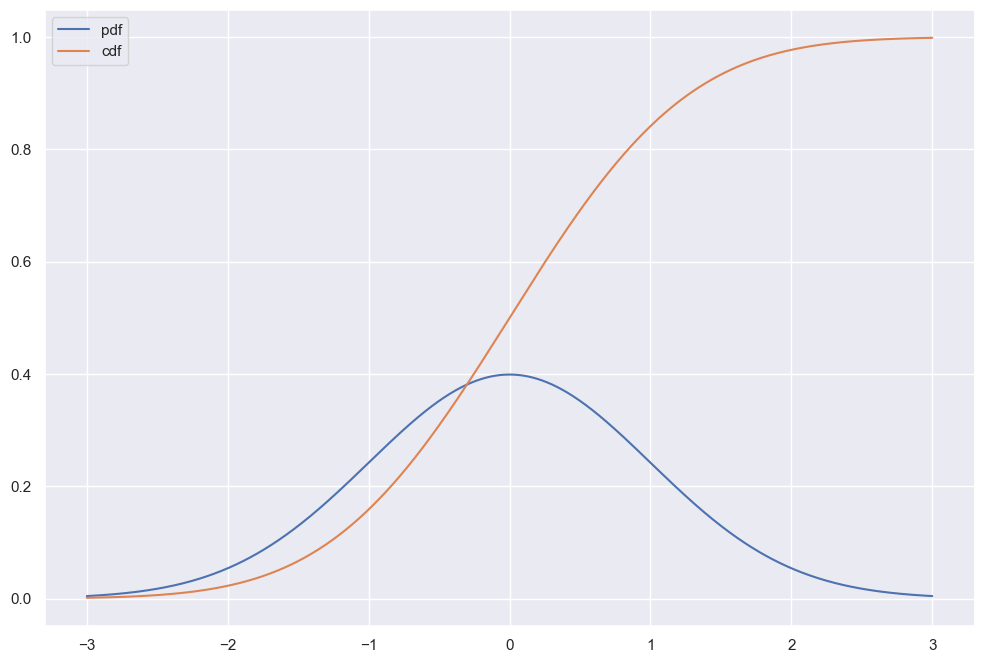

In [4]:
# Here we have both the pdf and cdf and notice that we here use samples
x = np.linspace(-3,3,1000)
mu = 0
sigma = 1
y_pdf = stats.norm.pdf(x,mu,sigma)
y_cdf = stats.norm.cdf(x,mu,sigma)

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')

plt.legend();

In [5]:
# Let us create a UDF which we can use to plot later on
def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = stats.norm.cdf(x, mu, sigma)
    else:
        y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)

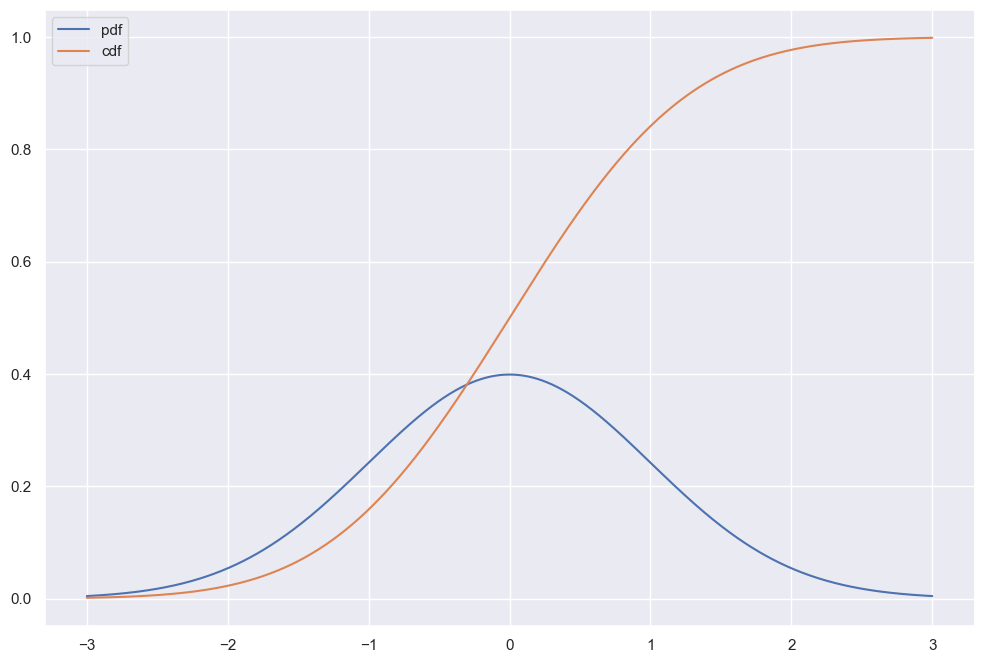

In [6]:
# As you can see, we get exactly the same as above
x = np.linspace(-3, 3, 1000)

plot_normal(x, label='pdf')
plot_normal(x, cdf=True, label='cdf')
plt.legend();

a) P(X > 13) = 0.0668


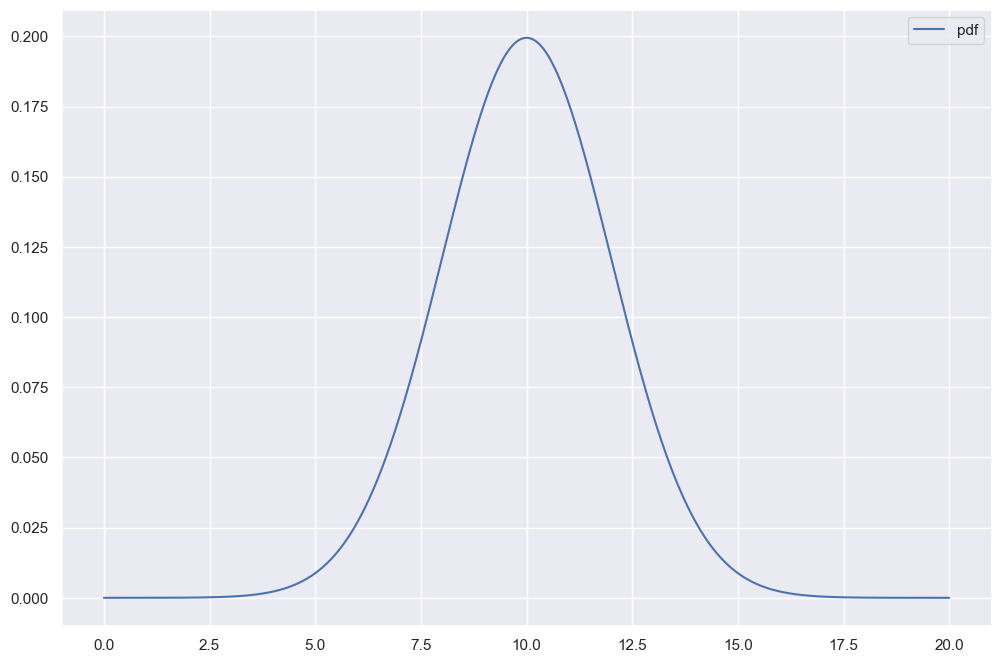

In [7]:
x = 13
mu = 10
sigma = np.sqrt(4)

prob = stats.norm.sf(x,mu,sigma)
print('a) P(X > ' + repr(x) + ')' + ' = ' + repr(round(prob,4)))
n = np.linspace(0, 20, 1000)

plot_normal(n,mu,sigma, label='pdf')
plt.legend();

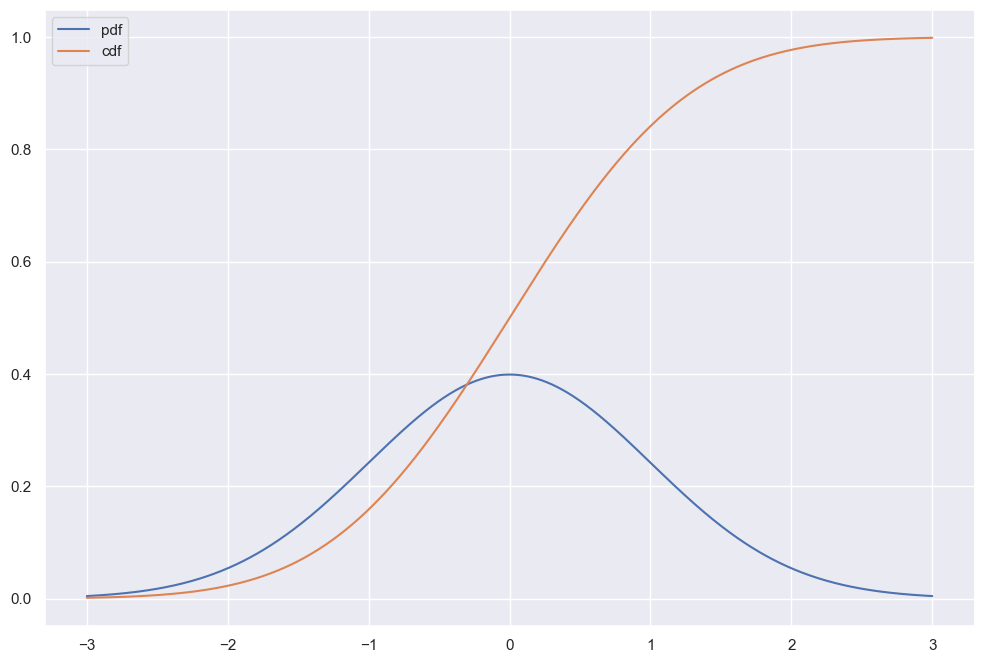

In [8]:
x = np.linspace(-3, 3, 1000)

plot_normal(x, label='pdf')
plot_normal(x, cdf=True, label='cdf')
plt.legend();

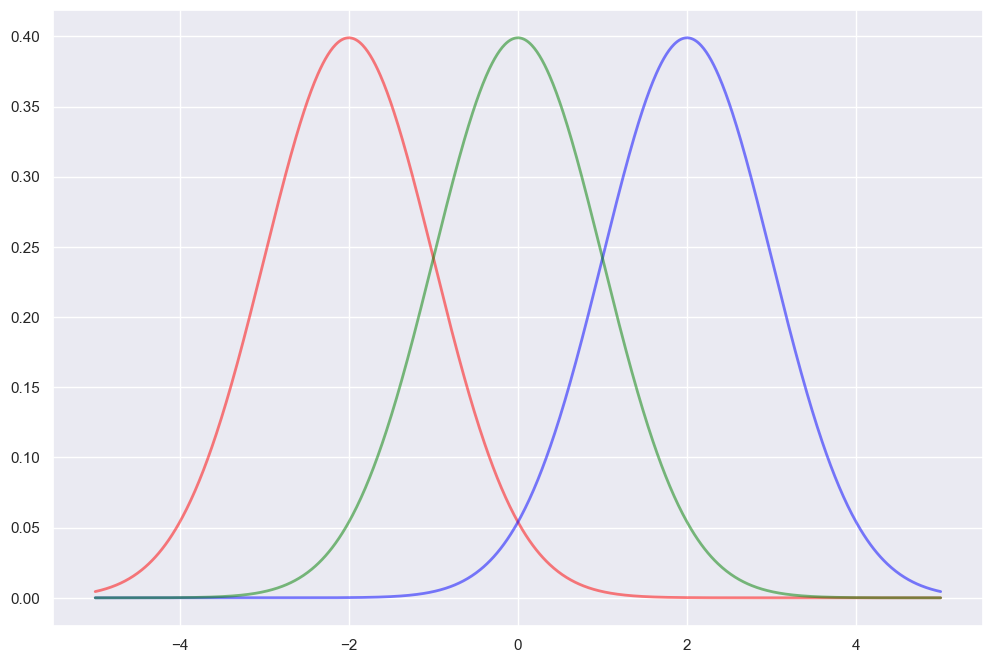

In [9]:
# Let us see what happens when we change our parameters
x = np.linspace(-5, 5, 1000)

plot_normal(x, -2, 1, color='red', lw=2, ls='-', alpha=0.5)
plot_normal(x, 2, 1, color='blue', lw=2, ls='-', alpha=0.5)
plot_normal(x, 0, 1, color='green', lw=2, ls='-', alpha=0.5);

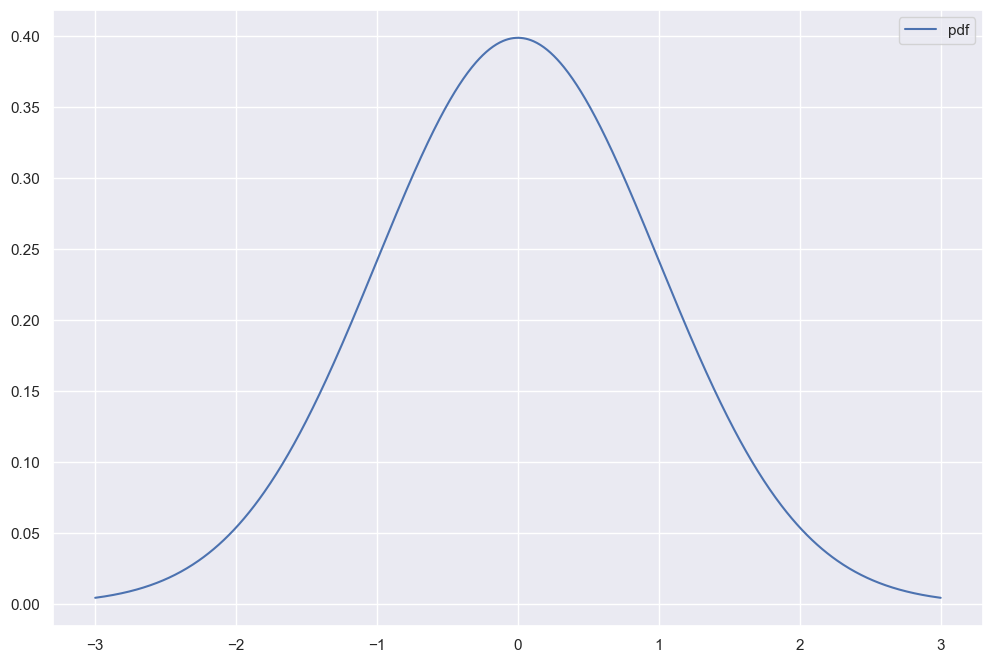

In [10]:
x = np.linspace(-3, 3, 1000)
plot_normal(x, label='pdf')
plt.legend();

In [11]:
# Let us create a UDF which will enable us to shade areas under the curve

def draw_z_score(x, cond, mu, sigma, title):
    y = stats.norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

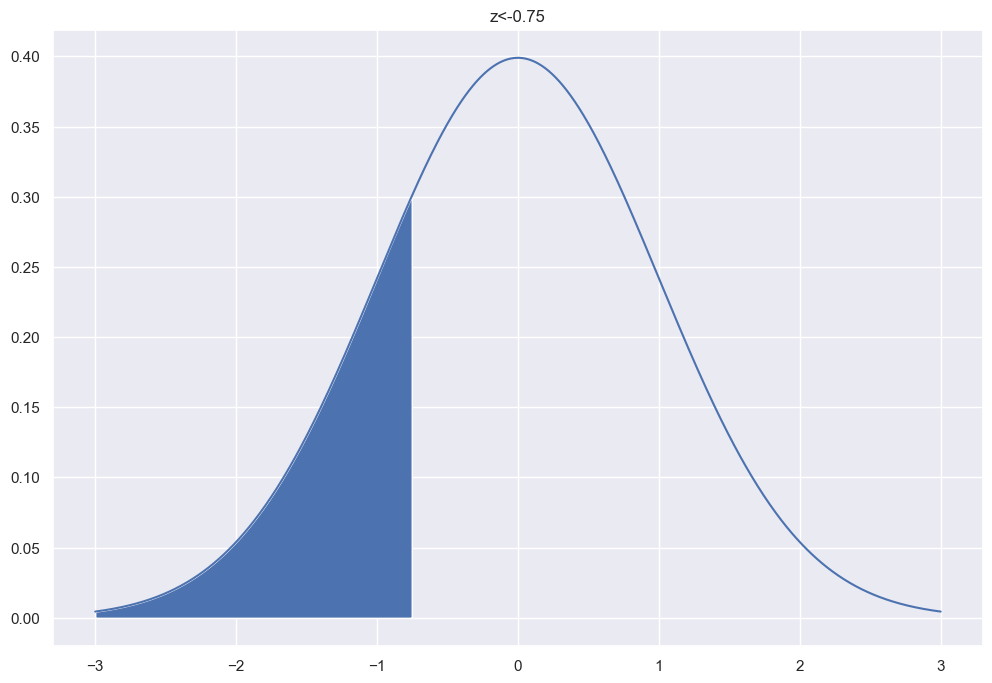

In [12]:
x = np.linspace(-3,3,1000)
z0 = -0.75
draw_z_score(x, x<z0, 0, 1, 'z<-0.75')

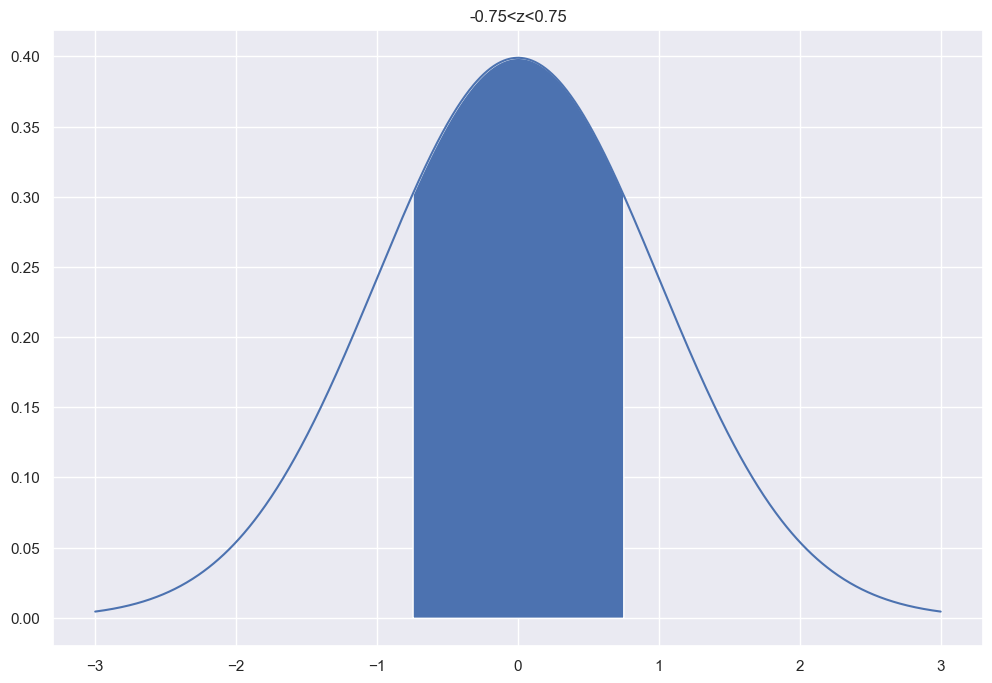

In [13]:
z0 = 0.75
draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, '-0.75<z<0.75')

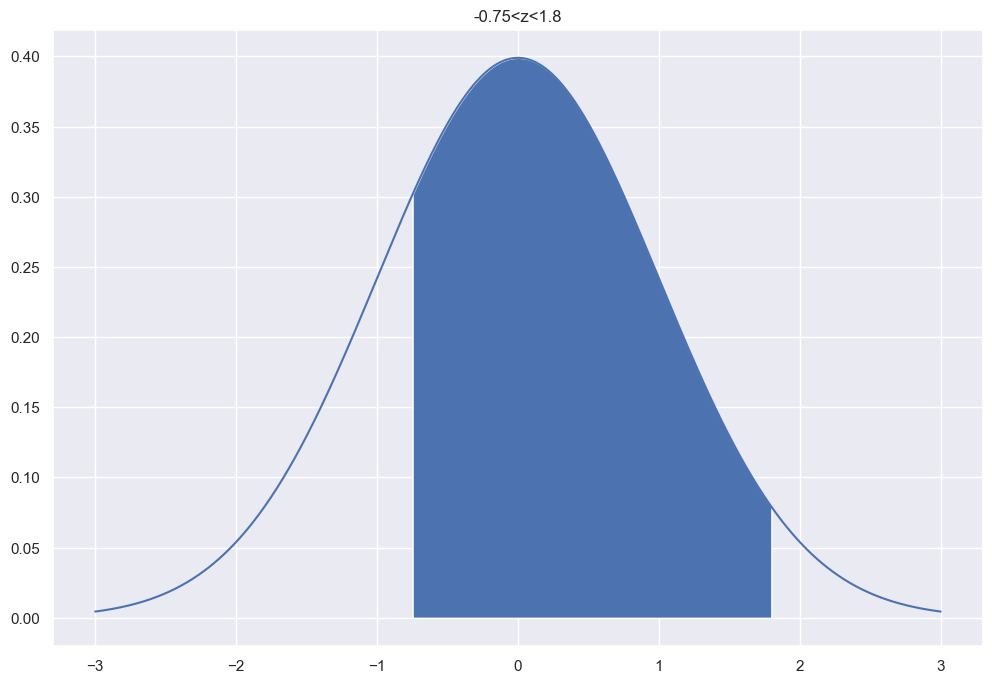

In [14]:
z0 = -0.75
z1 = 1.8
draw_z_score(x, (z0 < x) & (x < z1), 0, 1, '-0.75<z<1.8')

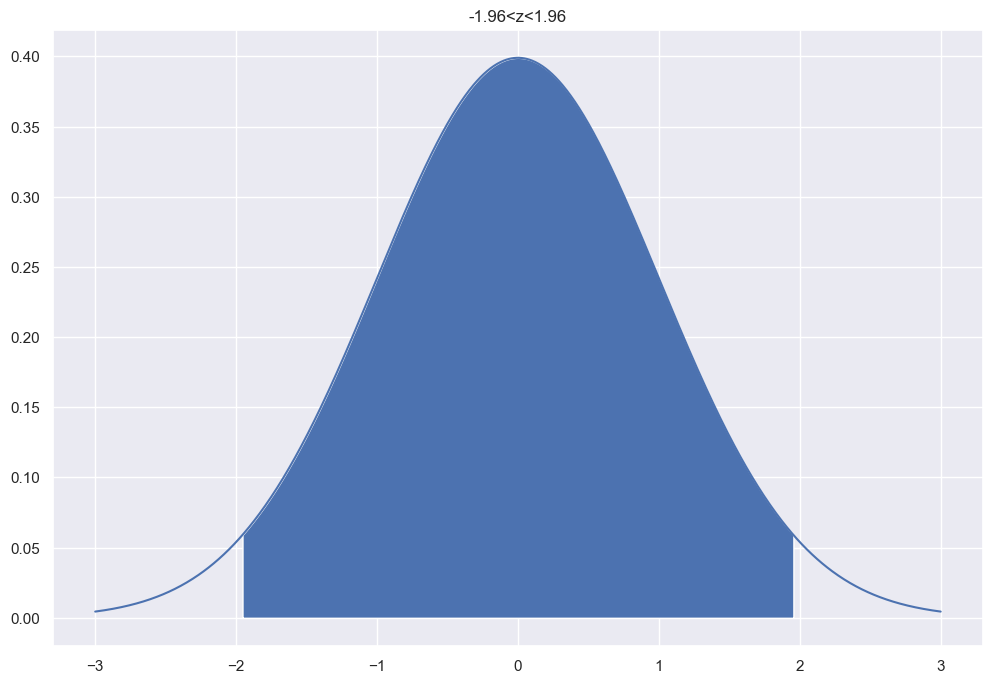

In [15]:
z0 = -1.96
z1 = 1.96
draw_z_score(x, (z0 < x) & (x < z1), 0, 1, '-1.96<z<1.96')

#### Example 4-13/14 page 125-126

P(X > 13) = 0.0668


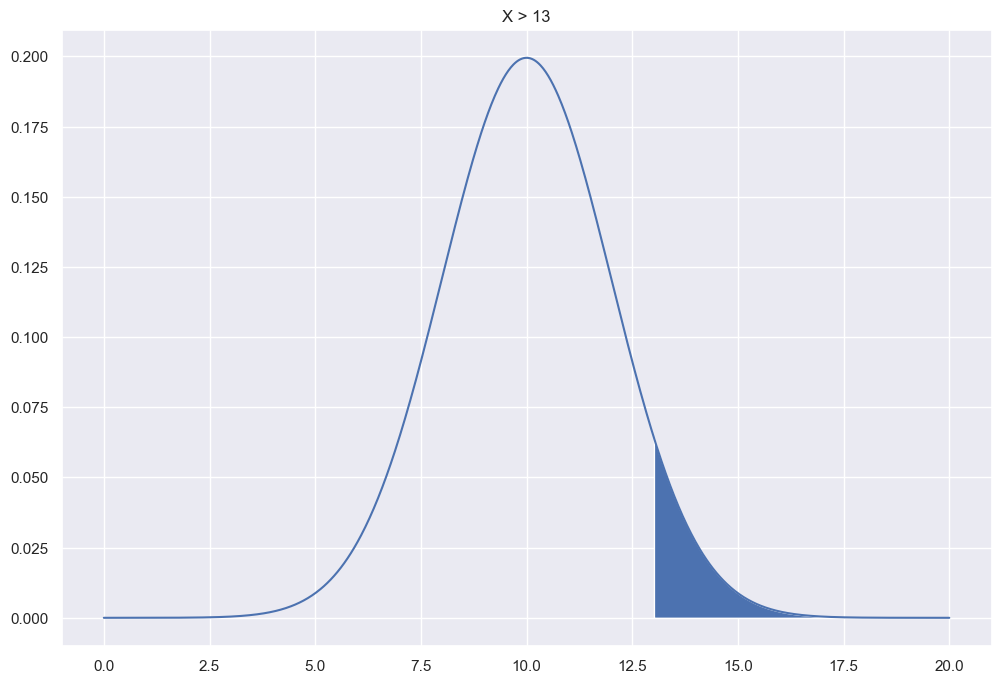

P(9 < X < 11) = 0.3829


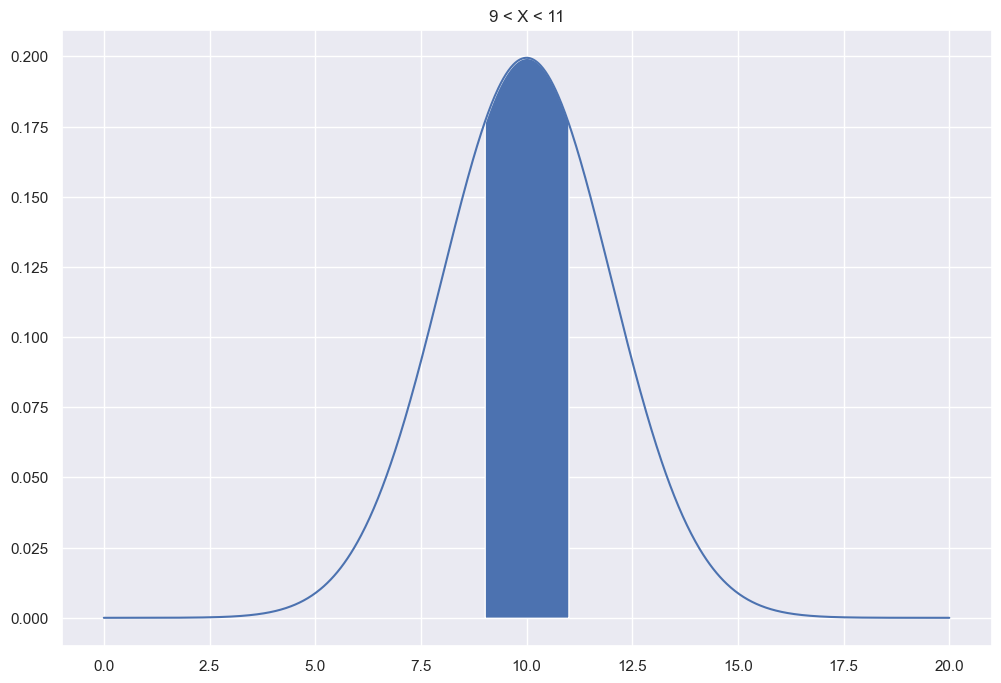

In [16]:
x = 13
mu = 10
sigma = np.sqrt(4)
n = np.linspace(0, 20, 1000)

prob = stats.norm.sf(x,mu,sigma)
print('P(X > ' + repr(x) + ')' + ' = ' + repr(round(prob,4)))


draw_z_score(n, x<=n, mu, sigma, 'X > 13')

x1 = 9
x2 = 11

prob2 = stats.norm.cdf(x2, mu, sigma)-stats.norm.cdf(x1, mu, sigma)
print('P('+ repr(x1) + ' < X < ' + repr(x2) + ')' + 
      ' = ' + repr(round(prob2,4)))

draw_z_score(n, (x1 <= n) & (n <= x2), mu, sigma, '9 < X < 11')


Normal distribution: histogram and PDF
=======================================

Explore the normal distribution: a histogram built from samples and the
PDF (probability density function).



In [17]:
# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=100)

# Compute a histogram of the sample
bins = np.linspace(-3, 3, 30)
histogram, bins = np.histogram(samples, bins=bins, normed=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object

pdf = stats.norm.pdf(bin_centers)

plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

TypeError: histogram() got an unexpected keyword argument 'normed'

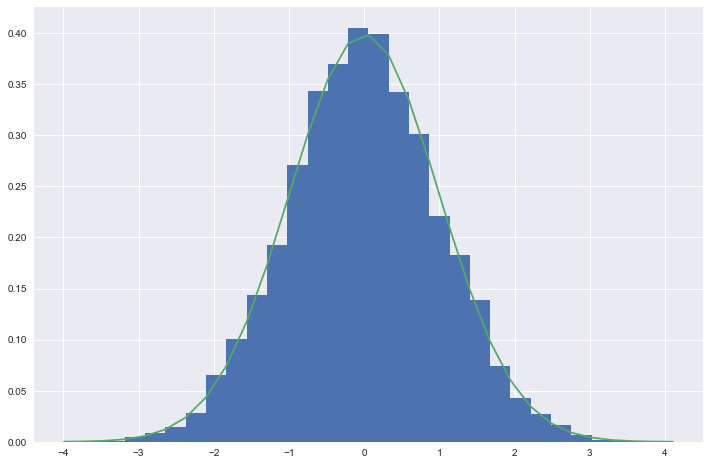

In [ ]:
# Same as above but a different type of histogram. Let's change n.
mu, sigma = 0, 1
s = np.random.normal(mu, sigma,10000)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 30, density=True)

# Plot the distribution curve
pdf = stats.norm.pdf(bins)
plt.plot(bins, pdf, label="PDF")
plt.show()

Importing data - in this case from Excel
============

In [ ]:
# Notice that I do not use headers
df = pd.read_excel('C:/Users/RIB/OneDrive/Documents/Arbejde/Stochastic modeling and processes/Old/Excel/EX06_14.XLS', header=None)

In [ ]:
df.head()

,0
0,88.5
1,94.7
2,84.3
3,90.1
4,89.0


In [ ]:
df.describe()

,0
count,83.000000
mean,90.533735
std,2.888382
min,83.400000
25%,88.600000
50%,90.400000
75%,92.200000
max,100.300000


In [ ]:
df.shape

(83, 1)

In [ ]:
df.ndim

2

In [ ]:
df.dtypes

0    float64
dtype: object

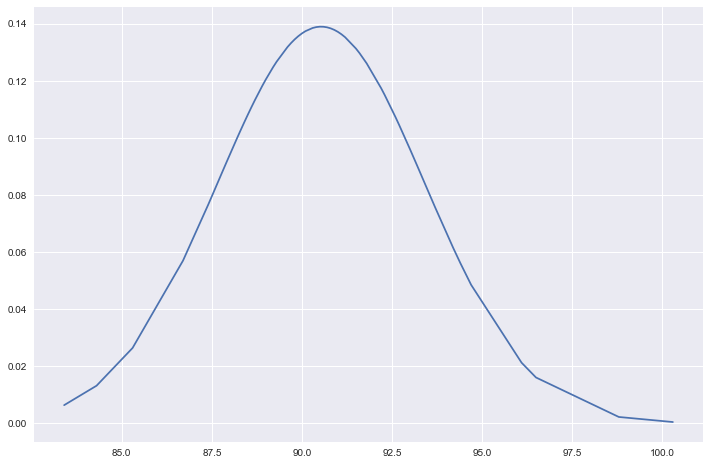

In [ ]:
# To plot this data, we need to sort and then fit the data to a normal
# distribution, basically, we insert the values for mu and std.

x = sorted(df[0])
plot_normal(x, np.mean(x),np.std(x))

In [ ]:
# Plot the distribution curve and add a histogram - a few tweeks
pdf = stats.norm.pdf(x, np.mean(x), np.std(x))
plt.plot(x, pdf, '-o', label="PDF")
plt.hist(df[0], density=True, rwidth=0.93)

plt.xlabel('Motor Fuel Octane Ratings')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [ ]:
# Plot the distribution curve and histogram
pdf = stats.norm.pdf(sorted(df[0]), np.mean(df[0]), np.std(df[0]))
plt.plot(sorted(df[0]), pdf, '-o', color='g')
plt.hist(df[0], density=True, rwidth=0.9)
plt.show()

Normal Probability Plot
========

For many applications, it will be important to make sure that our data is normally distributed, especially if we have small sample sizes. We can do this in many ways, but one of the most commonly used ways is a normal probability plot.

In [ ]:
stats.probplot(df[0], plot=plt)
plt.ylabel('Motor Fuel Octane Ratings')
plt.show()

Plotting a Kernel Density Estimate (KDE)
===========

In this tutorial, you’ve been working with samples, statistically speaking. Whether the data is discrete or continuous, it’s assumed to be derived from a population that has a true, exact distribution described by just a few parameters.

A kernel density estimation (KDE) is a way to estimate the probability density function (PDF) of the random variable that “underlies” our sample. KDE is a means of data smoothing.

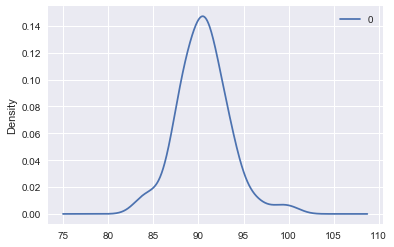

In [ ]:
# Now, above we fitted using a normal distribution, here we kind of
# make a new distribution from the data and plot it.

df.plot.kde();

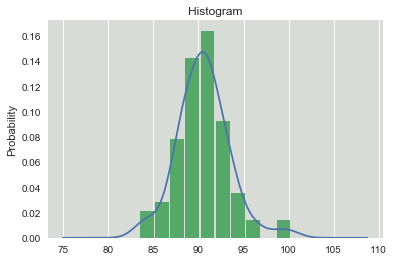

In [ ]:
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Histogram')
df.plot.hist(density=True, ax=ax, legend=False, rwidth=0.9)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

Plotting the cdf and cumulative histogram
==

In [ ]:
cdf = stats.norm.cdf(sorted(df[0]), np.mean(df[0]), np.std(df[0]))
plt.plot(sorted(df[0]), cdf, '-o', color='g')
plt.hist(df[0], density=True, rwidth=0.9, cumulative = True)
plt.show()

Comparing data
======

In [ ]:
df2 = pd.read_excel('C:/Users/RIB/OneDrive/Documents/Arbejde/Stochastic modeling and processes/Smoking_and_Cancer.xlsx')

In [ ]:
df2.head()

In [ ]:
df2.describe()

In [ ]:
# Note - the colors do not match, haven't figured out how to do that yet!
fig, ax = plt.subplots()
df2.plot.kde(ax=ax, title='Histogram')
df2.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='x')
ax.set_facecolor('#d8dcd6')

Boxplots
=============

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Basic Plot')
ax.boxplot(df[0])
plt.show()

In [ ]:
df3 = pd.read_excel('C:/Users/RIB/OneDrive/Documents/Arbejde/Stochastic modeling and processes/Old/Excel/EX06_12.XLS', header=None)

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Basic Plot')
ax.boxplot(df3[0])
plt.show()

In [ ]:
df4 = pd.read_excel('C:/Users/RIB/OneDrive/Documents/Arbejde/Stochastic modeling and processes/Old/Excel/EX06_57.XLS')

In [ ]:
df4.head()

In [ ]:
df4.shape

In [ ]:
df4.isna().sum()

In [ ]:
 df.isnull().any().any()

In [ ]:
 df.isnull().any()

In [ ]:
df4['High Dose'].dropna()

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Basic Plot')
ax.boxplot(df4['High Dose'].dropna())
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Basic Plot')
ax.boxplot(df4['Control'].dropna())
plt.show()

================================
The Exponential Distribution
==

In [ ]:
# Like above, we will create a UDF which we can use to plot
def plot_exponential(x_range, mu=0, sigma=1, cdf=False, **kwargs):

    x = x_range
    if cdf:
        y = stats.expon.cdf(x, mu, sigma)
    else:
        y = stats.expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)

In [ ]:
# Like above, we will create a UDF which we can use to plot
def plot_exponential(x_range, cdf=False, **kwargs):

    x = x_range
    if cdf:
        y = stats.expon.cdf(x)
    else:
        y = stats.expon.pdf(x)
    plt.plot(x, y, **kwargs)

In [ ]:
# Plotting with default mu

x = np.linspace(0, 5, 5000)

plot_exponential(x, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_exponential(x, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend();

In [ ]:
x = np.linspace(0, 5, 5000)
pdf = stats.expon.pdf(x)
r = stats.expon.rvs(size=5000)
plt.plot(x, pdf)
plt.hist(r, density=True, rwidth=0.9)
plt.show()

In [ ]:
# Exercise from slide
prob2 = stats.expon.cdf(x=2,scale=1/0.4)
prob1 = stats.expon.cdf(x=1,scale=1/0.4)
y1 = stats.expon.pdf(np.arange(0,1,0.001), scale=1/0.4)
y2 = stats.expon.pdf(np.arange(1,2,0.001), scale=1/0.4)
y3 = stats.expon.pdf(np.arange(2,10,0.001), scale=1/0.4)
x1 = np.arange(0,1,0.001)
x2 = np.arange(1,2,0.001)
x3 = np.arange(2,10,0.001)
plt.fill_between(x1, y1, facecolor='blue', alpha=0.5)
plt.fill_between(x2, y2, facecolor='red', alpha=0.5)
plt.fill_between(x3, y3, facecolor='blue', alpha=0.5)
plt.text(x=0.3, y=0.2, s= round(prob1,3))
plt.text(x=1.3, y=0.1, s= round(prob2-prob1,3))
plt.text(x=2.5, y=0.05, s= round(1-prob2,3))
plt.show()

In [ ]:
def draw_exp(x, cond, mu, title):
    y = stats.expon.pdf(x, scale=mu)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, stats.expon.pdf(z, scale=mu))
    plt.title(title)
    plt.show()

In [ ]:
x = np.arange(0,10,0.001)
x1 = 1
x2 = 2
draw_exp(x, (x1 < x) & (x < x2), 1/0.4, '1 < X < 2')

#### Ex 5

Let $X$ denote the time in hours from the start of the interval until the first log-on.

In [ ]:
# I could actually import the expon method!!!!

from scipy.stats import expon

mu=1/25
x = 0.1

prob1 = stats.expon.sf(x, 0, mu)
print('P(X > ' + repr(x) + ')' + ' = ' + repr(round(prob1,4)))

n = np.arange(0,0.3,0.01)
draw_exp(n, (x <= n), 1/25, 'X > 6 min')

x1 = 2/60
x2 = 3/60

prob2 = stats.expon.cdf(x2, 0, mu)-stats.expon.cdf(x1, 0, mu)
print('P('+ repr(round(x1,3)) + ' < X < ' + repr(round(x2,3)) + ')' + 
      ' = ' + repr(round(prob2,4)))

draw_exp(n, (x1 <= n) & (n <= x2), 1/25, '2 min < X < 3 min')

In [ ]:
print('x = ' + repr(round(60*stats.expon.isf(0.9, 0, mu),4)) + ' min')

#### Ex 6

In [ ]:
mu = 1.4
x = 0.5

prob1 = stats.expon.cdf(x, 0, mu)
print('P(X < ' + repr(x) + ')' + ' = ' + repr(round(prob1,4)))

n = np.arange(0,5,0.01)
draw_exp(n, (n <= x), 1.4, 'X < 30 sec')

#### Ex 7

In [ ]:
mu=1/2
x = 40/60

prob1 = stats.expon.cdf(x, 0, mu)
print('P(X < ' + repr(round(x,3)) + ')' + ' = ' + repr(round(prob1,4)))
n = np.arange(0,5,0.01)
draw_exp(n, (n <= x), 1/2, 'X < 40 sec')

In [ ]:
print('x = ' + repr(round(stats.expon.ppf(0.9, 0, mu),4)) + ' min')